In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("map5_predict_vs_actual_attack.csv")
df.rename(columns={'pos_yaw': 'pos_roll'}, inplace=True)

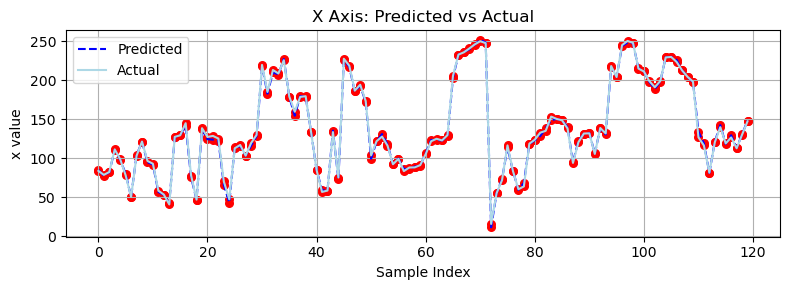

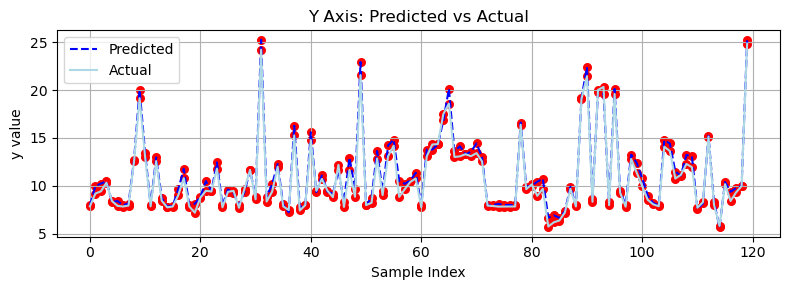

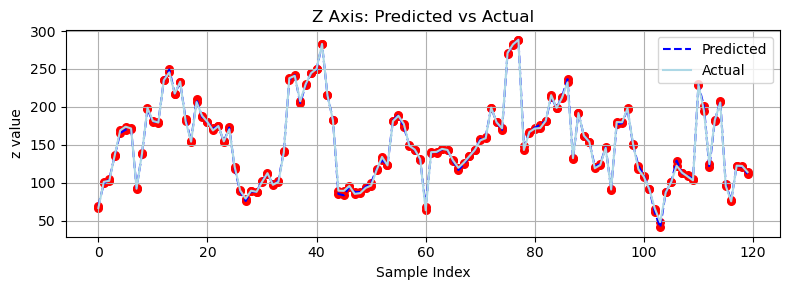

In [4]:
# X, Y, Z 좌표에 대한 예측과 실제 값을 비교하는 시각화 코드

def plot_pred_vs_actual(pred, actual, axis_label):
    plt.figure(figsize=(8, 3))
    plt.plot(df[pred], label='Predicted', linestyle='--', color='blue')
    plt.plot(df[actual], label='Actual', linestyle='-', color='lightblue')
    plt.scatter(range(len(df)), df[pred], color='red', s=30)
    plt.scatter(range(len(df)), df[actual], color='red', s=30)
    plt.title(f'{axis_label.upper()} Axis: Predicted vs Actual')
    plt.xlabel('Sample Index')
    plt.ylabel(f'{axis_label} value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# x, y, z 각각에 대해 시각화
plot_pred_vs_actual('predicted_hit_x', 'actual_hit_x', 'x')
plot_pred_vs_actual('predicted_hit_y', 'actual_hit_y', 'y')
plot_pred_vs_actual('predicted_hit_z', 'actual_hit_z', 'z')

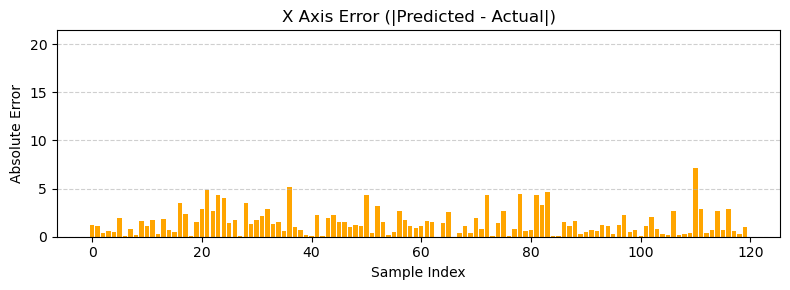

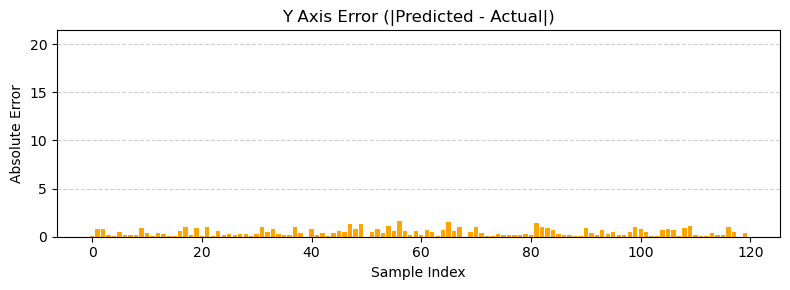

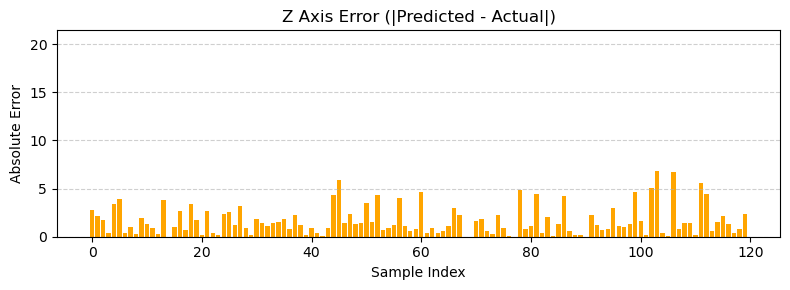

In [5]:
# X, Y, Z 오차 수치 막대그래프

# 오차 계산
df['error_x'] = abs(df['predicted_hit_x'] - df['actual_hit_x'])
df['error_y'] = abs(df['predicted_hit_y'] - df['actual_hit_y'])
df['error_z'] = abs(df['predicted_hit_z'] - df['actual_hit_z'])

# 전체 오차 중 최대값 찾기
max_error = max(df['error_x'].max(), df['error_y'].max(), df['error_z'].max())

# 시각화 함수 (y축 최대값 고정)
def plot_error_bar(error_col, axis_label):
    plt.figure(figsize=(8, 3))
    plt.bar(range(len(df)), df[error_col], color='orange')
    plt.title(f'{axis_label.upper()} Axis Error (|Predicted - Actual|)')
    plt.xlabel('Sample Index')
    plt.ylabel('Absolute Error')
    plt.ylim(0, max_error * 3)  # 최대값보다 10% 여유
    plt.grid(True, axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# 그래프 출력
plot_error_bar('error_x', 'x')
plot_error_bar('error_y', 'y')
plot_error_bar('error_z', 'z')

In [6]:
# Roll 구간별 거리 오차(x, y, z 거리 오차 합) 평균

# 360도 값을 ±180도 기준으로 정규화
df['normalized_roll'] = df['pos_roll'].apply(lambda x: x - 360 if x > 180 else x)

# 절대값 취해서 기울기 크기만 추출
df['abs_roll'] = df['normalized_roll'].abs()

# 절대값 기준 10도 간격으로 구간 나누기
df['abs_roll_bin'] = pd.cut(df['abs_roll'], bins=[0, 10, 20, 30, 40])

# 각 구간에서 평균 errors 계산
roll_error_summary = df.groupby('abs_roll_bin')['errors'].mean().reset_index()

# 보기 좋게 출력
display(roll_error_summary)

,abs_roll_bin,errors
0,"(0, 10]",2.284420
1,"(10, 20]",2.420900
2,"(20, 30]",2.636992
3,"(30, 40]",4.141863


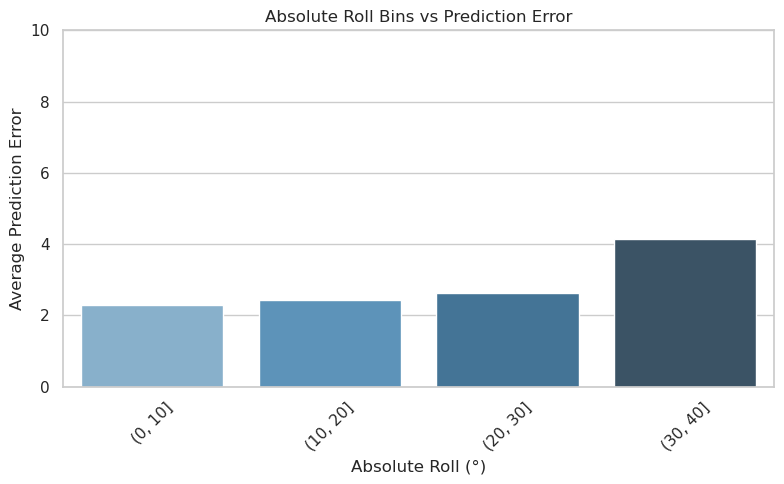

In [10]:
# Roll 구간별 거리 오차(x, y, z 거리 오차 합) 평균 막대그래프

import matplotlib.pyplot as plt
import seaborn as sns

# seaborn 스타일 적용 (optional)
sns.set(style="whitegrid")

# 막대그래프 그리기
plt.figure(figsize=(8, 5))
sns.barplot(
    x='abs_roll_bin',
    y='errors',
    hue='abs_roll_bin',  # 추가
    data=roll_error_summary,
    palette='Blues_d',
    legend=False         # 범례 제거
)

# 제목 및 라벨
plt.title('Absolute Roll Bins vs Prediction Error')
plt.xlabel('Absolute Roll (°)')
plt.ylabel('Average Prediction Error')

# y축 최대값 설정
plt.ylim(top=10)

# x축 라벨 회전 (선택)
plt.xticks(rotation=45)

# 그래프 출력
plt.tight_layout()
plt.show()